In [1]:
!pip install plotly

In [2]:
# check prophet version
import fbprophet
fbprophet.__version__

'0.7.1'

In [3]:
# basic tools
import os
import glob
import math
import re

# basic tools for ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import Model
import pystan
from fbprophet import Prophet
import plotly as go

## 데이터 불러오기

In [36]:
loc_1_1= pd.read_csv('./data/generation/PowerGeneration/loc_1(삼천포)/loc_1_p_1.csv',
                   encoding='cp949')
loc_1_2=pd.read_csv('./data/generation/PowerGeneration/loc_1(삼천포)/loc_1_p_2.csv',
                   encoding='cp949')
loc_2=pd.read_csv('./data/generation/PowerGeneration/loc_2(본사사옥_진주)/loc2_p.csv',
                   encoding='cp949')
loc_3 = pd.read_csv('./data/generation/PowerGeneration/loc_3(구미)/loc_3_p.csv',
                   encoding='cp949')
loc_4 = pd.read_csv('./data/generation/PowerGeneration/loc_4(두산MG_창원)/loc_4_p.csv',
                   encoding='cp949')
loc_1_w= pd.read_csv('./data/generation/PowerGeneration/loc_1(삼천포)/loc_1_w.csv',
                   encoding='cp949')
loc_2_w= pd.read_csv('./data/generation/PowerGeneration/loc_2(본사사옥_진주)/loc2_w.csv',
                   encoding='cp949')
loc_3_w= pd.read_csv('./data/generation/PowerGeneration/loc_3(구미)/loc_3_w.csv',
                   encoding='cp949')
loc_4_w= pd.read_csv('./data/generation/PowerGeneration/loc_4(두산MG_창원)/loc_4_w.csv',
                   encoding='cp949')

In [37]:
def drop_attributes(df):
    df=df.drop(["구분","평균","최대","최소","최대(시간별)","최소(시간별)","1","2","3","4","5","24"], axis=1)
    return df

def extract_hogi(df,num):
    df=df[df["호기"]==num]
    return df

loc_1_1_n = drop_attributes(loc_1_1)
loc_1_2_n = drop_attributes(loc_1_2)
loc_2_n = drop_attributes(loc_2)
loc_3_n = drop_attributes(loc_3)
loc_4_n = drop_attributes(loc_4)

GenerationLoc_list = [] #지역별로 hogi_list를 담는 list 
#GenerationLoc_list[location_num][hogi_num] = location_num번째 지역에 해당하는 hogi_num 번째 발전기의 발전량

####################LOC_1
hogi_list = []         #각 지역의 호기 list
for i in range(1,5):
    hogi_list.append(extract_hogi(loc_1_1_n,i))
    
hogi_list.append(extract_hogi(loc_1_2_n,1))
hogi_list.append(extract_hogi(loc_1_2_n,2))

GenerationLoc_list.append(hogi_list)

####################LOC_2
hogi_list = []        
hogi_list.append(extract_hogi(loc_2_n,1))
GenerationLoc_list.append(hogi_list)


####################LOC_3
hogi_list = []        
hogi_list.append(extract_hogi(loc_3_n,1))
GenerationLoc_list.append(hogi_list)


####################LOC_4
hogi_list = []        
hogi_list.append(extract_hogi(loc_4_n,1))
GenerationLoc_list.append(hogi_list)

GenerationLoc_list[0][3].head(50)

,년월일,호기,총량,6,7,8,9,10,11,12,...,14,15,16,17,18,19,20,21,22,23
3,2020-07-01,4,6732.36,0.00,23.76,298.98,475.92,550.80,146.88,150.12,...,114.30,106.92,504.00,301.14,72.18,36.00,0.00,1389.96,1485.54,952.02
7,2020-07-02,4,6399.72,0.00,106.02,345.42,409.14,517.86,127.62,100.44,...,100.98,100.80,100.80,514.98,407.16,149.40,0.18,1388.52,1484.10,445.50
11,2020-07-03,4,2767.32,0.00,12.42,107.10,146.34,165.78,106.74,100.44,...,100.62,100.44,100.44,225.90,57.96,0.36,0.00,1386.36,55.80,0.00
15,2020-07-04,4,5261.94,0.00,38.70,211.14,617.40,876.06,178.74,100.44,...,100.62,100.62,100.62,298.08,93.96,52.92,0.00,1388.34,1004.04,0.00
19,2020-07-05,4,6113.34,0.18,93.78,272.52,435.42,545.94,156.06,100.80,...,101.52,102.96,100.62,346.68,313.20,75.06,3.24,1387.44,1484.28,489.06
23,2020-07-06,4,1104.12,0.00,0.00,0.00,96.30,212.58,87.12,67.32,...,98.82,66.60,50.04,55.80,11.88,1.08,0.00,259.92,0.00,0.00
27,2020-07-07,4,6828.12,0.00,15.48,80.10,462.60,692.82,122.94,104.58,...,110.88,495.54,391.50,264.06,149.58,19.08,0.00,1382.76,1476.72,957.60
31,2020-07-08,4,8748.72,0.00,76.32,259.38,579.78,662.94,163.08,104.40,...,104.40,1038.78,853.56,617.76,257.40,82.62,6.30,1382.76,1480.86,975.42
35,2020-07-09,4,4082.04,0.00,9.18,177.84,388.80,449.10,115.56,100.98,...,100.80,100.26,99.36,132.84,138.78,18.54,0.00,1383.48,766.26,0.00
39,2020-07-10,4,3411.00,0.00,0.00,0.00,0.00,13.68,97.38,100.62,...,100.80,101.34,101.88,201.42,113.22,112.14,0.00,1379.70,988.38,0.00


In [40]:
date = GenerationLoc_list[2][0]['년월일']
type(date)

pandas.core.series.Series

In [41]:
generation = GenerationLoc_list[2][0]['총량']
generation

0      2984.04
1      4146.26
2      1648.08
3      2830.18
4      2876.33
        ...   
179    1218.02
180    3380.47
181    2262.31
182    4210.34
183    4161.82
Name: 총량, Length: 184, dtype: float64

## 예측값 비교를 위한 원본 데이터

In [42]:
###호기 cloumn drop 
for i in range(len(GenerationLoc_list[0])):
    GenerationLoc_list[0][i]=GenerationLoc_list[0][i].drop(["호기","년월일","총량"],axis=1)

GenerationLoc_list[1][0]=GenerationLoc_list[1][0].drop(["호기","년월일","총량"],axis=1)
GenerationLoc_list[2][0]=GenerationLoc_list[2][0].drop(["호기","년월일","총량"],axis=1)
GenerationLoc_list[3][0]=GenerationLoc_list[3][0].drop(["호기","년월일","총량"],axis=1)

GenerationLoc_list[2][0].head()

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.00,13.82,79.56,265.46,282.17,213.84,298.44,470.02,523.22,399.60,169.42,142.92,105.34,20.23,0.00,0.0,0.0,0.0
1,0.29,37.58,148.03,356.98,409.68,586.37,692.71,592.49,439.06,378.07,179.86,166.68,115.27,42.55,0.65,0.0,0.0,0.0
2,0.07,5.83,66.89,115.20,160.49,184.18,155.38,208.22,251.06,252.79,199.51,36.36,8.28,3.82,0.00,0.0,0.0,0.0
3,0.00,1.66,52.56,118.30,304.34,271.08,417.82,453.53,326.23,115.13,408.60,172.73,138.24,49.10,0.86,0.0,0.0,0.0
4,0.22,23.26,112.46,162.14,257.40,325.87,361.37,420.12,335.81,169.27,253.80,245.95,159.12,48.17,1.37,0.0,0.0,0.0


In [43]:
GenerationLoc_list[2][0].describe()

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.0,184.0,184.0
mean,0.007446,3.357772,47.913696,182.638478,317.868370,409.904783,453.130272,469.533315,437.788750,358.253098,247.639402,127.184457,44.269946,7.020652,0.056685,0.0,0.0,0.0
std,0.045575,8.653555,44.776415,113.691662,176.475587,209.776802,230.346494,224.354746,214.446716,190.058777,151.267487,114.049627,60.609630,15.552427,0.246657,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,0.000000,4.967500,93.327500,165.275000,222.192500,265.967500,311.655000,255.005000,223.812500,120.152500,5.900000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,0.000000,0.000000,37.870000,180.615000,341.100000,454.715000,498.385000,522.075000,495.650000,397.690000,238.395000,113.545000,8.640000,0.000000,0.000000,0.0,0.0,0.0
75%,0.000000,1.387500,77.382500,293.510000,473.722500,598.100000,658.585000,677.175000,629.660000,517.592500,375.370000,213.357500,73.437500,3.437500,0.000000,0.0,0.0,0.0
max,0.430000,57.600000,168.260000,359.930000,601.340000,714.100000,781.700000,764.280000,726.840000,652.610000,529.990000,401.980000,230.470000,91.940000,1.870000,0.0,0.0,0.0


## change dtype to datetime

In [44]:
date = pd.to_datetime(date)
date.info()

<class 'pandas.core.series.Series'>
Int64Index: 184 entries, 0 to 183
Series name: 년월일
Non-Null Count  Dtype         
--------------  -----         
184 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.9 KB


In [45]:
type(date)

pandas.core.series.Series

## Fill in empty dataframe for prophet

In [46]:
# row = len(generation)
# col = 2

# prophet = pd.DataFrame(np.zeros(row*col).reshape((row), -1),  columns=('ds', 'y'))
# prophet

In [47]:
# prophet['ds'] = date
# prophet

In [48]:
# prophet['y'] = generation
# prophet

In [49]:
leng = len(date)    # 1461
periods = 30

prophet_df = pd.DataFrame({'ds':date.iloc[:leng-30],
                            'y':generation.iloc[:leng-30]
})

display(prophet_df.info())
display(prophet_df.head(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      154 non-null    datetime64[ns]
 1   y       154 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.6 KB


None

,ds,y
0,2020-07-01,2984.04
1,2020-07-02,4146.26
2,2020-07-03,1648.08


In [50]:
# 모델 설정
model_prophet = Prophet()
# 훈련
loss = model_prophet.fit(prophet_df)
# 예측용 데이터 프레임 만들기
df_pred = model_prophet.make_future_dataframe(periods=periods)
# 예측
predict = model_prophet.predict(df_pred)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [51]:
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


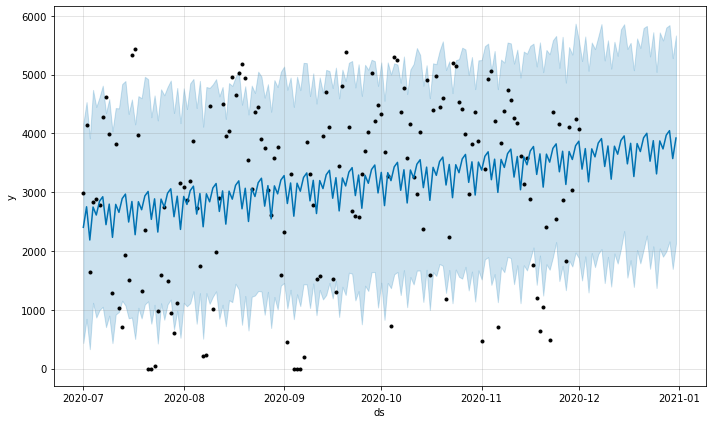

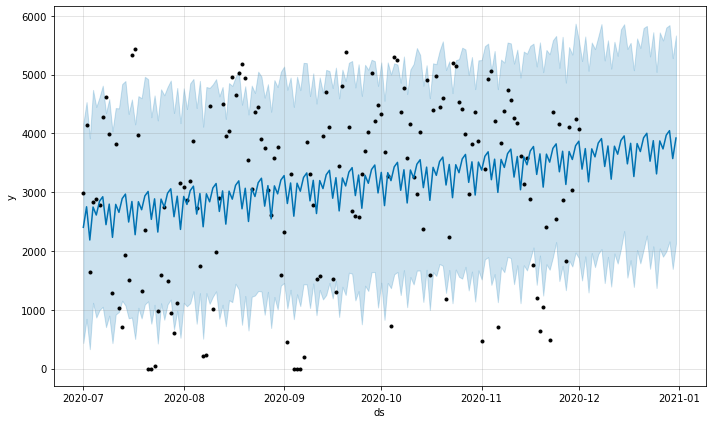

In [52]:
model_prophet.plot(predict)

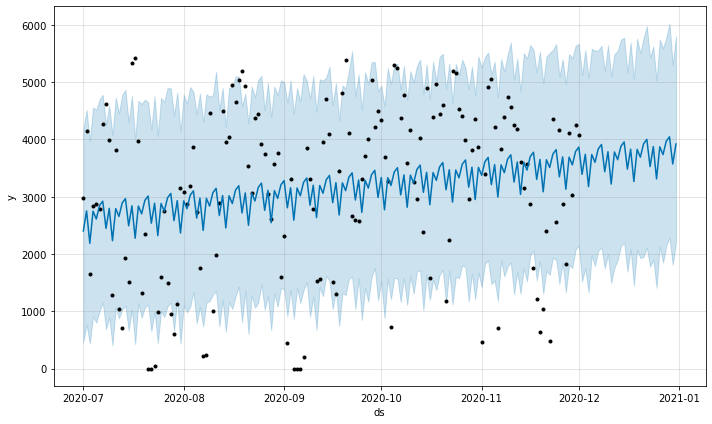

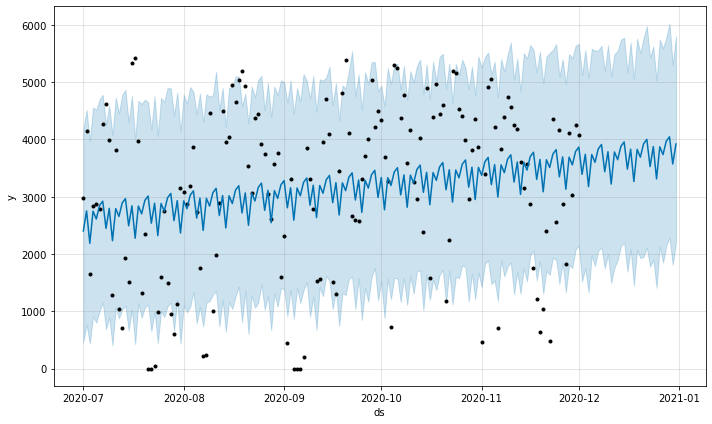

In [53]:
model_prophet.plot(forecast)

In [54]:
type(predict)

pandas.core.frame.DataFrame

In [55]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-01,2618.952066,435.325908,4167.778535,2618.952066,2618.952066,-216.699505,-216.699505,-216.699505,-216.699505,-216.699505,-216.699505,0.0,0.0,0.0,2402.252562
1,2020-07-02,2625.375936,845.684990,4532.179623,2625.375936,2625.375936,126.289892,126.289892,126.289892,126.289892,126.289892,126.289892,0.0,0.0,0.0,2751.665827
2,2020-07-03,2631.799805,329.317164,3915.363670,2631.799805,2631.799805,-445.274163,-445.274163,-445.274163,-445.274163,-445.274163,-445.274163,0.0,0.0,0.0,2186.525642
3,2020-07-04,2638.223674,1117.628283,4739.188841,2638.223674,2638.223674,109.223312,109.223312,109.223312,109.223312,109.223312,109.223312,0.0,0.0,0.0,2747.446986
4,2020-07-05,2644.647543,867.531763,4450.097780,2644.647543,2644.647543,-33.364089,-33.364089,-33.364089,-33.364089,-33.364089,-33.364089,0.0,0.0,0.0,2611.283454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2020-12-27,3768.819947,1903.214384,5580.045852,3768.819797,3768.820104,-33.364089,-33.364089,-33.364089,-33.364089,-33.364089,-33.364089,0.0,0.0,0.0,3735.455858
180,2020-12-28,3775.243752,1990.228919,5799.285271,3775.243592,3775.243916,195.042102,195.042102,195.042102,195.042102,195.042102,195.042102,0.0,0.0,0.0,3970.285854
181,2020-12-29,3781.667556,2162.529572,5841.457517,3781.667383,3781.667731,264.782451,264.782451,264.782451,264.782451,264.782451,264.782451,0.0,0.0,0.0,4046.450007
182,2020-12-30,3788.091360,1694.682098,5279.630537,3788.091180,3788.091547,-216.699505,-216.699505,-216.699505,-216.699505,-216.699505,-216.699505,0.0,0.0,0.0,3571.391856


In [56]:
GenerationLoc_list[2][0]

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.00,13.82,79.56,265.46,282.17,213.84,298.44,470.02,523.22,399.60,169.42,142.92,105.34,20.23,0.00,0.0,0.0,0.0
1,0.29,37.58,148.03,356.98,409.68,586.37,692.71,592.49,439.06,378.07,179.86,166.68,115.27,42.55,0.65,0.0,0.0,0.0
2,0.07,5.83,66.89,115.20,160.49,184.18,155.38,208.22,251.06,252.79,199.51,36.36,8.28,3.82,0.00,0.0,0.0,0.0
3,0.00,1.66,52.56,118.30,304.34,271.08,417.82,453.53,326.23,115.13,408.60,172.73,138.24,49.10,0.86,0.0,0.0,0.0
4,0.22,23.26,112.46,162.14,257.40,325.87,361.37,420.12,335.81,169.27,253.80,245.95,159.12,48.17,1.37,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.00,0.00,7.42,179.57,282.38,230.26,211.46,139.61,105.70,57.82,3.82,0.00,0.00,0.00,0.00,0.0,0.0,0.0
180,0.00,0.00,20.38,146.74,316.22,568.51,613.87,614.52,548.42,393.55,155.66,2.59,0.00,0.00,0.00,0.0,0.0,0.0
181,0.00,0.00,4.10,89.35,229.68,542.38,594.72,535.68,179.57,79.42,7.42,0.00,0.00,0.00,0.00,0.0,0.0,0.0
182,0.00,0.00,29.88,319.97,312.34,599.18,781.70,762.77,659.45,515.30,224.93,4.82,0.00,0.00,0.00,0.0,0.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


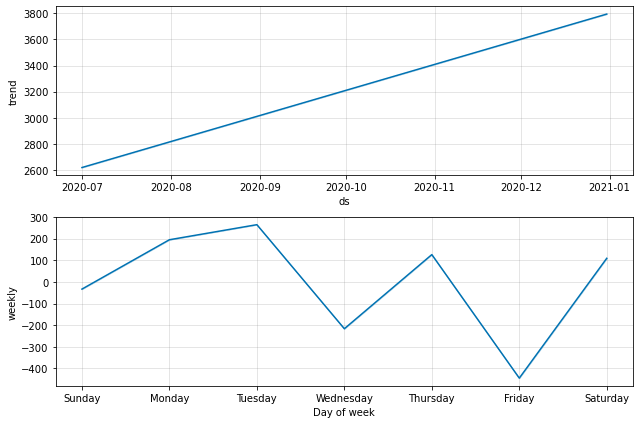

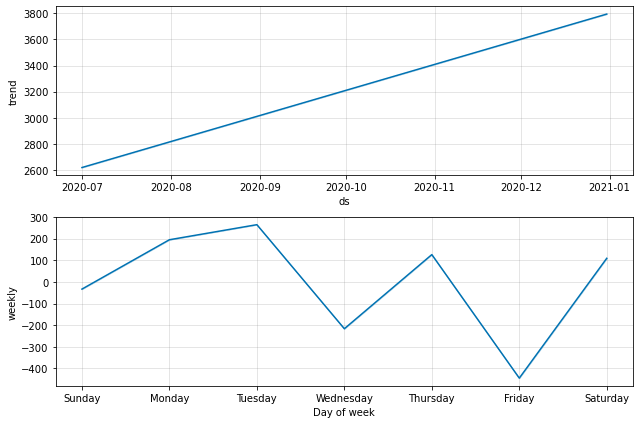

In [60]:
model_prophet.plot_components(predict)

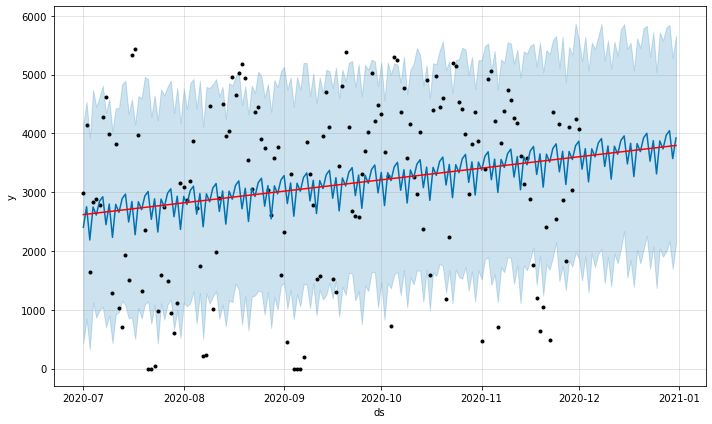

In [61]:
# 변화지점 확인
from prophet.plot import add_changepoints_to_plot

fig = model_prophet.plot(predict)
a = add_changepoints_to_plot(fig.gca(), model_prophet, predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


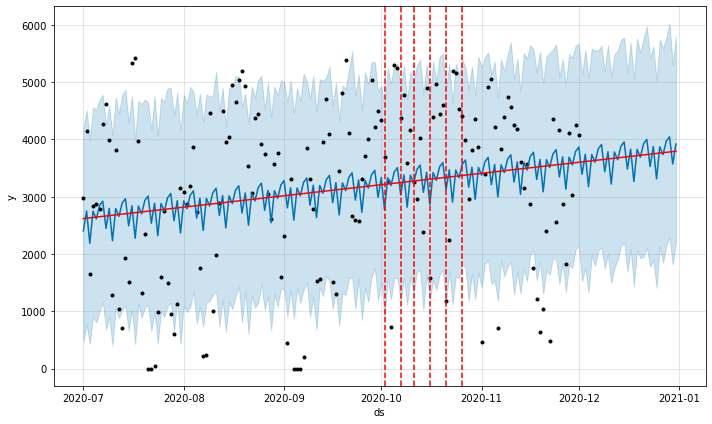

In [64]:
model_prophet = Prophet(changepoint_prior_scale=0.3)
model_prophet.fit(prophet_df)

fig = model_prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_prophet, forecast)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


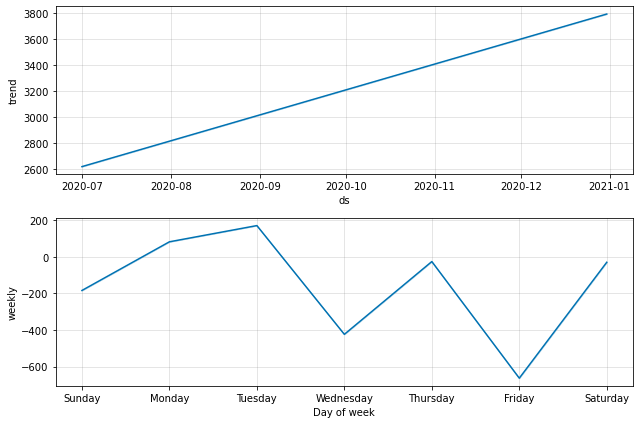

In [66]:
model_prophet = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False
)

model_prophet.fit(prophet_df)
fig = model_prophet.plot_components(forecast)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


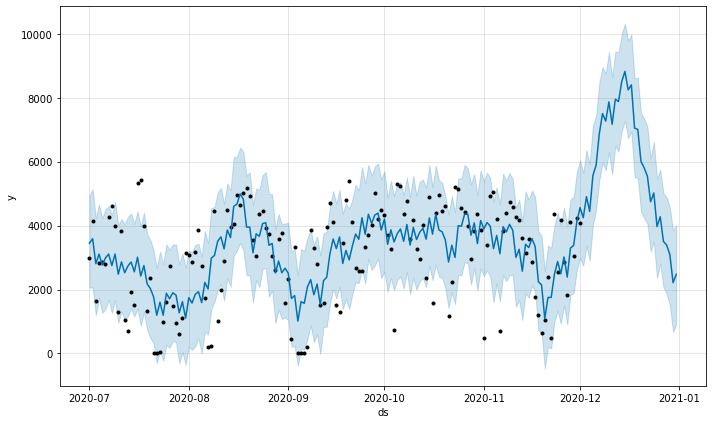

In [69]:
model_prophet = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,  # default 
    yearly_seasonality=10,   # 20으로 하면 더 잘잡아주는데 overfitting 위험 있음 
    daily_seasonality=False,
    seasonality_mode='multiplicative'  # or additive 
)

# Specifying Custom Seasonalities
model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)

model_prophet.fit(prophet_df)
forecast = model_prophet.predict(future)
fig1 = model_prophet.plot(forecast)

In [71]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-07-01,3122.672635,2056.653214,4950.011911,3122.672635,3122.672635,-0.085647,-0.085647,-0.085647,0.104474,...,-0.093722,-0.093722,-0.093722,0.283843,0.283843,0.283843,0.0,0.0,0.0,3448.909672
1,2020-07-02,3129.547441,2069.440310,5141.617457,3129.547441,3129.547441,-0.101731,-0.101731,-0.101731,0.148061,...,0.006356,0.006356,0.006356,0.243436,0.243436,0.243436,0.0,0.0,0.0,3592.910454
2,2020-07-03,3136.422247,1189.183947,4229.827483,3136.422247,3136.422247,-0.136064,-0.136064,-0.136064,-0.104201,...,-0.169567,-0.169567,-0.169567,0.201430,0.201430,0.201430,0.0,0.0,0.0,2809.602579
3,2020-07-04,3143.297053,1737.487738,4662.967941,3143.297053,3143.297053,-0.172707,-0.172707,-0.172707,-0.011030,...,0.003373,0.003373,0.003373,0.158304,0.158304,0.158304,0.0,0.0,0.0,3108.627560
4,2020-07-05,3150.171859,1273.694980,4234.361171,3150.171859,3150.171859,-0.186254,-0.186254,-0.186254,-0.122574,...,-0.050827,-0.050827,-0.050827,0.114506,0.114506,0.114506,0.0,0.0,0.0,2764.041940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2020-12-27,4353.262984,2070.792595,5010.245428,4353.262955,4353.263012,-0.013592,-0.013592,-0.013592,-0.194098,...,-0.050827,-0.050827,-0.050827,-0.129679,-0.129679,-0.129679,0.0,0.0,0.0,3508.304867
180,2020-12-28,4360.137791,1861.536059,4893.919658,4360.137760,4360.137821,-0.057161,-0.057161,-0.057161,-0.222358,...,0.035762,0.035762,0.035762,-0.200960,-0.200960,-0.200960,0.0,0.0,0.0,3390.624957
181,2020-12-29,4367.012598,1518.866754,4576.833007,4367.012565,4367.012629,-0.080612,-0.080612,-0.080612,-0.291171,...,0.052606,0.052606,0.052606,-0.263165,-0.263165,-0.263165,0.0,0.0,0.0,3095.463947
182,2020-12-30,4373.887405,669.430339,3845.003810,4373.887370,4373.887437,-0.084535,-0.084535,-0.084535,-0.493391,...,-0.093722,-0.093722,-0.093722,-0.315134,-0.315134,-0.315134,0.0,0.0,0.0,2215.851009
